In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
print(os.listdir('/ship/train'))

['images', 'train.csv']


In [3]:
df = pd.read_csv('/ship/train/train.csv')
df.head(10)

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2
5,621252.jpg,4
6,2833467.jpg,1
7,2843780.jpg,5
8,2859567.jpg,3
9,2896557.jpg,1


In [4]:
ship_type = {'cargo':1, 'Military': 2,'Carrier': 3,'Cruise': 4,'Tankers': 5}

In [5]:
def PlotDistribution(ship_type,df):
    
    ship_type_distribution = {list(ship_type)[i]: 0 for i in range(len(ship_type))}
    
    for i, j in ship_type.items():
        for k in df.iloc[:,1].values:
            if k == j:
                ship_type_distribution[i] +=1
            
    names = list(ship_type_distribution.keys())
    values = list(ship_type_distribution.values())
    
    fig, ax = plt.subplots()
    
    ax.barh(names, values)
    ax.set_xlabel('numbers of ship')
    ax.set_title('Ship Type Distribution')
    
    

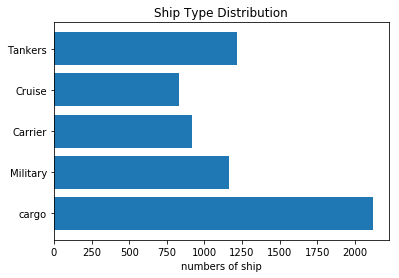

In [6]:
PlotDistribution(ship_type,df)

In [7]:
test = pd.read_csv('/ship/test.csv')

In [8]:
test.values

array([['1007700.jpg'],
       ['1011369.jpg'],
       ['1051155.jpg'],
       ...,
       ['951323.jpg'],
       ['952113.jpg'],
       ['953982.jpg']], dtype=object)

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

data_set = []
data_names = []
test_set=[]
test_names = []
for dirname, _, filenames in os.walk('/ship/train/images'):
    
    for filename in filenames:
        
        if os.path.join(filename) in test.values: 
            
            img_test = load_img(os.path.join(dirname, filename), target_size = (224,224))
            test_img_array = img_to_array(img_test)/255
            test_set.append(test_img_array)
            test_names.append(os.path.join(filename)[0:-4])
            
        else:
            
            img = load_img(os.path.join(dirname, filename),target_size = (224,224))
            img_array = img_to_array(img)/255
            data_set.append(img_array)
            data_names.append(os.path.join(filename)[0:-4])
            
        print(os.path.join(dirname, filename))
           

/ship/train/images\1001524.jpg
/ship/train/images\1001804.jpg
/ship/train/images\1003035.jpg
/ship/train/images\1004028.jpg
/ship/train/images\1004054.jpg
/ship/train/images\1005343.jpg
/ship/train/images\1007700.jpg
/ship/train/images\1008439.jpg
/ship/train/images\1010906.jpg
/ship/train/images\1011369.jpg
/ship/train/images\1011813.jpg
/ship/train/images\1013663.jpg
/ship/train/images\1014573.jpg
/ship/train/images\1015027.jpg
/ship/train/images\1016682.jpg
/ship/train/images\1016683.jpg
/ship/train/images\1019271.jpg
/ship/train/images\1048999.jpg
/ship/train/images\1049854.jpg
/ship/train/images\1051155.jpg
/ship/train/images\1056547.jpg
/ship/train/images\1056555.jpg
/ship/train/images\1059245.jpg
/ship/train/images\1062001.jpg
/ship/train/images\1062006.jpg
/ship/train/images\1069397.jpg
/ship/train/images\1072012.jpg
/ship/train/images\1072257.jpg
/ship/train/images\1072860.jpg
/ship/train/images\1072861.jpg
/ship/train/images\1073645.jpg
/ship/train/images\1079150.jpg
/ship/tr

/ship/train/images\1488288.jpg
/ship/train/images\1489241.jpg
/ship/train/images\1489274.jpg
/ship/train/images\1490746.jpg
/ship/train/images\1495100.jpg
/ship/train/images\1495101.jpg
/ship/train/images\1498652.jpg
/ship/train/images\1498654.jpg
/ship/train/images\1503907.jpg
/ship/train/images\1504422.jpg
/ship/train/images\1506544.jpg
/ship/train/images\1507218.jpg
/ship/train/images\1510486.jpg
/ship/train/images\1514473.jpg
/ship/train/images\1521257.jpg
/ship/train/images\1527871.jpg
/ship/train/images\1528432.jpg
/ship/train/images\1530484.jpg
/ship/train/images\1533033.jpg
/ship/train/images\1533107.jpg
/ship/train/images\1537918.jpg
/ship/train/images\1538920.jpg
/ship/train/images\1539121.jpg
/ship/train/images\1540155.jpg
/ship/train/images\1543752.jpg
/ship/train/images\1545305.jpg
/ship/train/images\1546031.jpg
/ship/train/images\1546450.jpg
/ship/train/images\1547632.jpg
/ship/train/images\1547779.jpg
/ship/train/images\1548056.jpg
/ship/train/images\1548062.jpg
/ship/tr

/ship/train/images\1879902.jpg
/ship/train/images\1881977.jpg
/ship/train/images\1882244.jpg
/ship/train/images\1882255.jpg
/ship/train/images\1882755.jpg
/ship/train/images\1884170.jpg
/ship/train/images\1884171.jpg
/ship/train/images\1884624.jpg
/ship/train/images\1884634.jpg
/ship/train/images\1884644.jpg
/ship/train/images\1885516.jpg
/ship/train/images\1886879.jpg
/ship/train/images\1887491.jpg
/ship/train/images\1887777.jpg
/ship/train/images\1889167.jpg
/ship/train/images\1892832.jpg
/ship/train/images\1892833.jpg
/ship/train/images\1892834.jpg
/ship/train/images\1893045.jpg
/ship/train/images\1893078.jpg
/ship/train/images\1893465.jpg
/ship/train/images\1893492.jpg
/ship/train/images\1895863.jpg
/ship/train/images\1896125.jpg
/ship/train/images\1896150.jpg
/ship/train/images\1896283.jpg
/ship/train/images\1897940.jpg
/ship/train/images\1898074.jpg
/ship/train/images\1898905.jpg
/ship/train/images\1899080.jpg
/ship/train/images\1900237.jpg
/ship/train/images\1900533.jpg
/ship/tr

/ship/train/images\2152478.jpg
/ship/train/images\2154070.jpg
/ship/train/images\2154234.jpg
/ship/train/images\2154895.jpg
/ship/train/images\2155186.jpg
/ship/train/images\2155752.jpg
/ship/train/images\2156459.jpg
/ship/train/images\2156629.jpg
/ship/train/images\2156632.jpg
/ship/train/images\2158882.jpg
/ship/train/images\2159094.jpg
/ship/train/images\2159864.jpg
/ship/train/images\2160112.jpg
/ship/train/images\2160804.jpg
/ship/train/images\2160806.jpg
/ship/train/images\2160809.jpg
/ship/train/images\2160815.jpg
/ship/train/images\2162662.jpg
/ship/train/images\2163247.jpg
/ship/train/images\2163250.jpg
/ship/train/images\2165627.jpg
/ship/train/images\2167676.jpg
/ship/train/images\2167913.jpg
/ship/train/images\2168636.jpg
/ship/train/images\2170813.jpg
/ship/train/images\2175707.jpg
/ship/train/images\2175708.jpg
/ship/train/images\2175709.jpg
/ship/train/images\2175711.jpg
/ship/train/images\2177161.jpg
/ship/train/images\2178271.jpg
/ship/train/images\2180725.jpg
/ship/tr

/ship/train/images\2663807.jpg
/ship/train/images\2663808.jpg
/ship/train/images\2663809.jpg
/ship/train/images\2665371.jpg
/ship/train/images\2666065.jpg
/ship/train/images\2666067.jpg
/ship/train/images\2666104.jpg
/ship/train/images\2666106.jpg
/ship/train/images\2666174.jpg
/ship/train/images\2666175.jpg
/ship/train/images\2666176.jpg
/ship/train/images\2666331.jpg
/ship/train/images\2666333.jpg
/ship/train/images\2666436.jpg
/ship/train/images\2666655.jpg
/ship/train/images\2668080.jpg
/ship/train/images\2668081.jpg
/ship/train/images\2668082.jpg
/ship/train/images\2668362.jpg
/ship/train/images\2668364.jpg
/ship/train/images\2668439.jpg
/ship/train/images\2669359.jpg
/ship/train/images\2669708.jpg
/ship/train/images\2669737.jpg
/ship/train/images\2669738.jpg
/ship/train/images\2669739.jpg
/ship/train/images\2669740.jpg
/ship/train/images\2669785.jpg
/ship/train/images\2669786.jpg
/ship/train/images\2669787.jpg
/ship/train/images\2670213.jpg
/ship/train/images\2670214.jpg
/ship/tr

/ship/train/images\2737489.jpg
/ship/train/images\2739099.jpg
/ship/train/images\2739702.jpg
/ship/train/images\2740041.jpg
/ship/train/images\2740631.jpg
/ship/train/images\2740632.jpg
/ship/train/images\2740782.jpg
/ship/train/images\2740803.jpg
/ship/train/images\2740839.jpg
/ship/train/images\2741178.jpg
/ship/train/images\2741468.jpg
/ship/train/images\2741686.jpg
/ship/train/images\2741687.jpg
/ship/train/images\2741688.jpg
/ship/train/images\2741689.jpg
/ship/train/images\2741690.jpg
/ship/train/images\2741691.jpg
/ship/train/images\2741740.jpg
/ship/train/images\2742201.jpg
/ship/train/images\2742682.jpg
/ship/train/images\2742685.jpg
/ship/train/images\2743440.jpg
/ship/train/images\2743442.jpg
/ship/train/images\2743443.jpg
/ship/train/images\2743445.jpg
/ship/train/images\2744085.jpg
/ship/train/images\2744087.jpg
/ship/train/images\2744601.jpg
/ship/train/images\2744699.jpg
/ship/train/images\2744714.jpg
/ship/train/images\2744715.jpg
/ship/train/images\2744724.jpg
/ship/tr

/ship/train/images\2784167.jpg
/ship/train/images\2784168.jpg
/ship/train/images\2784169.jpg
/ship/train/images\2784170.jpg
/ship/train/images\2784171.jpg
/ship/train/images\2784172.jpg
/ship/train/images\2784173.jpg
/ship/train/images\2784177.jpg
/ship/train/images\2784178.jpg
/ship/train/images\2784179.jpg
/ship/train/images\2784180.jpg
/ship/train/images\2784186.jpg
/ship/train/images\2784187.jpg
/ship/train/images\2784189.jpg
/ship/train/images\2784190.jpg
/ship/train/images\2784196.jpg
/ship/train/images\2784198.jpg
/ship/train/images\2784199.jpg
/ship/train/images\2784202.jpg
/ship/train/images\2784210.jpg
/ship/train/images\2784211.jpg
/ship/train/images\2784212.jpg
/ship/train/images\2784213.jpg
/ship/train/images\2784214.jpg
/ship/train/images\2784215.jpg
/ship/train/images\2784216.jpg
/ship/train/images\2784217.jpg
/ship/train/images\2784218.jpg
/ship/train/images\2784219.jpg
/ship/train/images\2784220.jpg
/ship/train/images\2784221.jpg
/ship/train/images\2784223.jpg
/ship/tr

/ship/train/images\2790298.jpg
/ship/train/images\2790302.jpg
/ship/train/images\2790303.jpg
/ship/train/images\2790306.jpg
/ship/train/images\2790312.jpg
/ship/train/images\2790314.jpg
/ship/train/images\2790315.jpg
/ship/train/images\2790316.jpg
/ship/train/images\2790319.jpg
/ship/train/images\2790323.jpg
/ship/train/images\2790324.jpg
/ship/train/images\2790326.jpg
/ship/train/images\2790327.jpg
/ship/train/images\2790329.jpg
/ship/train/images\2790330.jpg
/ship/train/images\2790346.jpg
/ship/train/images\2790347.jpg
/ship/train/images\2790348.jpg
/ship/train/images\2790349.jpg
/ship/train/images\2790350.jpg
/ship/train/images\2790351.jpg
/ship/train/images\2790352.jpg
/ship/train/images\2790353.jpg
/ship/train/images\2790355.jpg
/ship/train/images\2790361.jpg
/ship/train/images\2790377.jpg
/ship/train/images\2790386.jpg
/ship/train/images\2790392.jpg
/ship/train/images\2790393.jpg
/ship/train/images\2790397.jpg
/ship/train/images\2790399.jpg
/ship/train/images\2790400.jpg
/ship/tr

/ship/train/images\2797110.jpg
/ship/train/images\2798126.jpg
/ship/train/images\2798358.jpg
/ship/train/images\2798363.jpg
/ship/train/images\2798365.jpg
/ship/train/images\2798369.jpg
/ship/train/images\2798371.jpg
/ship/train/images\2798373.jpg
/ship/train/images\2798375.jpg
/ship/train/images\2798378.jpg
/ship/train/images\2798384.jpg
/ship/train/images\2798385.jpg
/ship/train/images\2798386.jpg
/ship/train/images\2798387.jpg
/ship/train/images\2798388.jpg
/ship/train/images\2798389.jpg
/ship/train/images\2798390.jpg
/ship/train/images\2798392.jpg
/ship/train/images\2798397.jpg
/ship/train/images\2798398.jpg
/ship/train/images\2798400.jpg
/ship/train/images\2798402.jpg
/ship/train/images\2798403.jpg
/ship/train/images\2798404.jpg
/ship/train/images\2798406.jpg
/ship/train/images\2798407.jpg
/ship/train/images\2798408.jpg
/ship/train/images\2798409.jpg
/ship/train/images\2798410.jpg
/ship/train/images\2798411.jpg
/ship/train/images\2798412.jpg
/ship/train/images\2798413.jpg
/ship/tr

/ship/train/images\2804594.jpg
/ship/train/images\2804605.jpg
/ship/train/images\2804606.jpg
/ship/train/images\2804607.jpg
/ship/train/images\2804611.jpg
/ship/train/images\2804612.jpg
/ship/train/images\2804613.jpg
/ship/train/images\2804614.jpg
/ship/train/images\2804617.jpg
/ship/train/images\2804618.jpg
/ship/train/images\2804619.jpg
/ship/train/images\2804620.jpg
/ship/train/images\2804624.jpg
/ship/train/images\2804632.jpg
/ship/train/images\2804633.jpg
/ship/train/images\2804634.jpg
/ship/train/images\2804635.jpg
/ship/train/images\2804636.jpg
/ship/train/images\2804637.jpg
/ship/train/images\2804641.jpg
/ship/train/images\2804643.jpg
/ship/train/images\2804644.jpg
/ship/train/images\2804645.jpg
/ship/train/images\2804646.jpg
/ship/train/images\2804648.jpg
/ship/train/images\2804649.jpg
/ship/train/images\2804651.jpg
/ship/train/images\2804653.jpg
/ship/train/images\2804654.jpg
/ship/train/images\2804655.jpg
/ship/train/images\2804656.jpg
/ship/train/images\2804657.jpg
/ship/tr

/ship/train/images\2808788.jpg
/ship/train/images\2808789.jpg
/ship/train/images\2808790.jpg
/ship/train/images\2808791.jpg
/ship/train/images\2808793.jpg
/ship/train/images\2808794.jpg
/ship/train/images\2808795.jpg
/ship/train/images\2808796.jpg
/ship/train/images\2808798.jpg
/ship/train/images\2808802.jpg
/ship/train/images\2808804.jpg
/ship/train/images\2808809.jpg
/ship/train/images\2808815.jpg
/ship/train/images\2808819.jpg
/ship/train/images\2808829.jpg
/ship/train/images\2808832.jpg
/ship/train/images\2808835.jpg
/ship/train/images\2808836.jpg
/ship/train/images\2808977.jpg
/ship/train/images\2808979.jpg
/ship/train/images\2809020.jpg
/ship/train/images\2809175.jpg
/ship/train/images\2809399.jpg
/ship/train/images\2809485.jpg
/ship/train/images\2809506.jpg
/ship/train/images\2809507.jpg
/ship/train/images\2809688.jpg
/ship/train/images\2809690.jpg
/ship/train/images\2809692.jpg
/ship/train/images\2809759.jpg
/ship/train/images\2809760.jpg
/ship/train/images\2809762.jpg
/ship/tr

/ship/train/images\2814877.jpg
/ship/train/images\2814878.jpg
/ship/train/images\2814879.jpg
/ship/train/images\2814884.jpg
/ship/train/images\2814886.jpg
/ship/train/images\2814887.jpg
/ship/train/images\2814888.jpg
/ship/train/images\2814889.jpg
/ship/train/images\2814892.jpg
/ship/train/images\2814893.jpg
/ship/train/images\2814894.jpg
/ship/train/images\2814895.jpg
/ship/train/images\2814896.jpg
/ship/train/images\2814898.jpg
/ship/train/images\2814922.jpg
/ship/train/images\2814928.jpg
/ship/train/images\2814932.jpg
/ship/train/images\2814935.jpg
/ship/train/images\2814940.jpg
/ship/train/images\2814943.jpg
/ship/train/images\2814949.jpg
/ship/train/images\2814952.jpg
/ship/train/images\2814953.jpg
/ship/train/images\2814954.jpg
/ship/train/images\2814956.jpg
/ship/train/images\2814958.jpg
/ship/train/images\2814959.jpg
/ship/train/images\2814960.jpg
/ship/train/images\2814962.jpg
/ship/train/images\2814963.jpg
/ship/train/images\2814964.jpg
/ship/train/images\2814981.jpg
/ship/tr

/ship/train/images\2819063.jpg
/ship/train/images\2819071.jpg
/ship/train/images\2819072.jpg
/ship/train/images\2819073.jpg
/ship/train/images\2819074.jpg
/ship/train/images\2819075.jpg
/ship/train/images\2819082.jpg
/ship/train/images\2819083.jpg
/ship/train/images\2819084.jpg
/ship/train/images\2819085.jpg
/ship/train/images\2819086.jpg
/ship/train/images\2819088.jpg
/ship/train/images\2819090.jpg
/ship/train/images\2819339.jpg
/ship/train/images\2819583.jpg
/ship/train/images\2819584.jpg
/ship/train/images\2819586.jpg
/ship/train/images\2819587.jpg
/ship/train/images\2819807.jpg
/ship/train/images\2820305.jpg
/ship/train/images\2820608.jpg
/ship/train/images\2820687.jpg
/ship/train/images\2821005.jpg
/ship/train/images\2821006.jpg
/ship/train/images\2821013.jpg
/ship/train/images\2821017.jpg
/ship/train/images\2821020.jpg
/ship/train/images\2821021.jpg
/ship/train/images\2821023.jpg
/ship/train/images\2821028.jpg
/ship/train/images\2821029.jpg
/ship/train/images\2821033.jpg
/ship/tr

/ship/train/images\2825262.jpg
/ship/train/images\2825263.jpg
/ship/train/images\2825264.jpg
/ship/train/images\2825265.jpg
/ship/train/images\2825270.jpg
/ship/train/images\2825274.jpg
/ship/train/images\2825276.jpg
/ship/train/images\2825277.jpg
/ship/train/images\2825278.jpg
/ship/train/images\2825279.jpg
/ship/train/images\2825280.jpg
/ship/train/images\2825281.jpg
/ship/train/images\2825283.jpg
/ship/train/images\2825284.jpg
/ship/train/images\2825303.jpg
/ship/train/images\2825607.jpg
/ship/train/images\2825610.jpg
/ship/train/images\2825622.jpg
/ship/train/images\2825823.jpg
/ship/train/images\2825824.jpg
/ship/train/images\2825956.jpg
/ship/train/images\2825958.jpg
/ship/train/images\2826038.jpg
/ship/train/images\2826040.jpg
/ship/train/images\2826226.jpg
/ship/train/images\2826261.jpg
/ship/train/images\2826503.jpg
/ship/train/images\2826666.jpg
/ship/train/images\2826667.jpg
/ship/train/images\2826668.jpg
/ship/train/images\2826669.jpg
/ship/train/images\2826672.jpg
/ship/tr

/ship/train/images\2831388.jpg
/ship/train/images\2831390.jpg
/ship/train/images\2831393.jpg
/ship/train/images\2831394.jpg
/ship/train/images\2831398.jpg
/ship/train/images\2831400.jpg
/ship/train/images\2831403.jpg
/ship/train/images\2831405.jpg
/ship/train/images\2831406.jpg
/ship/train/images\2831407.jpg
/ship/train/images\2831408.jpg
/ship/train/images\2831413.jpg
/ship/train/images\2831414.jpg
/ship/train/images\2831415.jpg
/ship/train/images\2831417.jpg
/ship/train/images\2831418.jpg
/ship/train/images\2831421.jpg
/ship/train/images\2831422.jpg
/ship/train/images\2831423.jpg
/ship/train/images\2831425.jpg
/ship/train/images\2831427.jpg
/ship/train/images\2831428.jpg
/ship/train/images\2831430.jpg
/ship/train/images\2831443.jpg
/ship/train/images\2831444.jpg
/ship/train/images\2831445.jpg
/ship/train/images\2831446.jpg
/ship/train/images\2831447.jpg
/ship/train/images\2831448.jpg
/ship/train/images\2831449.jpg
/ship/train/images\2831450.jpg
/ship/train/images\2831452.jpg
/ship/tr

/ship/train/images\2840840.jpg
/ship/train/images\2840908.jpg
/ship/train/images\2840909.jpg
/ship/train/images\2840922.jpg
/ship/train/images\2840923.jpg
/ship/train/images\2840924.jpg
/ship/train/images\2840925.jpg
/ship/train/images\2840926.jpg
/ship/train/images\2840989.jpg
/ship/train/images\2841091.jpg
/ship/train/images\2841141.jpg
/ship/train/images\2841142.jpg
/ship/train/images\2841144.jpg
/ship/train/images\2841339.jpg
/ship/train/images\2841341.jpg
/ship/train/images\2841342.jpg
/ship/train/images\2841543.jpg
/ship/train/images\2841546.jpg
/ship/train/images\2841553.jpg
/ship/train/images\2841554.jpg
/ship/train/images\2841556.jpg
/ship/train/images\2841557.jpg
/ship/train/images\2841558.jpg
/ship/train/images\2841559.jpg
/ship/train/images\2841562.jpg
/ship/train/images\2841563.jpg
/ship/train/images\2841564.jpg
/ship/train/images\2841568.jpg
/ship/train/images\2841569.jpg
/ship/train/images\2841570.jpg
/ship/train/images\2841573.jpg
/ship/train/images\2841574.jpg
/ship/tr

/ship/train/images\2844061.jpg
/ship/train/images\2844063.jpg
/ship/train/images\2844067.jpg
/ship/train/images\2844068.jpg
/ship/train/images\2844071.jpg
/ship/train/images\2844121.jpg
/ship/train/images\2844196.jpg
/ship/train/images\2844230.jpg
/ship/train/images\2844233.jpg
/ship/train/images\2844287.jpg
/ship/train/images\2844369.jpg
/ship/train/images\2844371.jpg
/ship/train/images\2844372.jpg
/ship/train/images\2844406.jpg
/ship/train/images\2844407.jpg
/ship/train/images\2844408.jpg
/ship/train/images\2844427.jpg
/ship/train/images\2844428.jpg
/ship/train/images\2844477.jpg
/ship/train/images\2844568.jpg
/ship/train/images\2844681.jpg
/ship/train/images\2844682.jpg
/ship/train/images\2844684.jpg
/ship/train/images\2844696.jpg
/ship/train/images\2844697.jpg
/ship/train/images\2844698.jpg
/ship/train/images\2844700.jpg
/ship/train/images\2844727.jpg
/ship/train/images\2844747.jpg
/ship/train/images\2844752.jpg
/ship/train/images\2844797.jpg
/ship/train/images\2844911.jpg
/ship/tr

/ship/train/images\2848827.jpg
/ship/train/images\2848829.jpg
/ship/train/images\2848831.jpg
/ship/train/images\2848832.jpg
/ship/train/images\2848950.jpg
/ship/train/images\2849130.jpg
/ship/train/images\2849131.jpg
/ship/train/images\2849132.jpg
/ship/train/images\2849133.jpg
/ship/train/images\2849263.jpg
/ship/train/images\2849338.jpg
/ship/train/images\2849339.jpg
/ship/train/images\2849340.jpg
/ship/train/images\2849381.jpg
/ship/train/images\2849382.jpg
/ship/train/images\2849471.jpg
/ship/train/images\2849489.jpg
/ship/train/images\2849490.jpg
/ship/train/images\2849645.jpg
/ship/train/images\2849748.jpg
/ship/train/images\2849749.jpg
/ship/train/images\2849754.jpg
/ship/train/images\2849755.jpg
/ship/train/images\2849756.jpg
/ship/train/images\2849757.jpg
/ship/train/images\2849765.jpg
/ship/train/images\2849766.jpg
/ship/train/images\2849769.jpg
/ship/train/images\2849770.jpg
/ship/train/images\2849771.jpg
/ship/train/images\2849772.jpg
/ship/train/images\2849775.jpg
/ship/tr

/ship/train/images\2853132.jpg
/ship/train/images\2853152.jpg
/ship/train/images\2853155.jpg
/ship/train/images\2853165.jpg
/ship/train/images\2853175.jpg
/ship/train/images\2853247.jpg
/ship/train/images\2853288.jpg
/ship/train/images\2853323.jpg
/ship/train/images\2853324.jpg
/ship/train/images\2853325.jpg
/ship/train/images\2853331.jpg
/ship/train/images\2853335.jpg
/ship/train/images\2853340.jpg
/ship/train/images\2853360.jpg
/ship/train/images\2853423.jpg
/ship/train/images\2853551.jpg
/ship/train/images\2853769.jpg
/ship/train/images\2853794.jpg
/ship/train/images\2853853.jpg
/ship/train/images\2853855.jpg
/ship/train/images\2853861.jpg
/ship/train/images\2853863.jpg
/ship/train/images\2853868.jpg
/ship/train/images\2853886.jpg
/ship/train/images\2853887.jpg
/ship/train/images\2853890.jpg
/ship/train/images\2853892.jpg
/ship/train/images\2853893.jpg
/ship/train/images\2853895.jpg
/ship/train/images\2853899.jpg
/ship/train/images\2853900.jpg
/ship/train/images\2853901.jpg
/ship/tr

/ship/train/images\2858036.jpg
/ship/train/images\2858038.jpg
/ship/train/images\2858049.jpg
/ship/train/images\2858050.jpg
/ship/train/images\2858051.jpg
/ship/train/images\2858052.jpg
/ship/train/images\2858053.jpg
/ship/train/images\2858054.jpg
/ship/train/images\2858058.jpg
/ship/train/images\2858065.jpg
/ship/train/images\2858067.jpg
/ship/train/images\2858073.jpg
/ship/train/images\2858074.jpg
/ship/train/images\2858078.jpg
/ship/train/images\2858086.jpg
/ship/train/images\2858101.jpg
/ship/train/images\2858103.jpg
/ship/train/images\2858107.jpg
/ship/train/images\2858115.jpg
/ship/train/images\2858116.jpg
/ship/train/images\2858118.jpg
/ship/train/images\2858119.jpg
/ship/train/images\2858120.jpg
/ship/train/images\2858121.jpg
/ship/train/images\2858122.jpg
/ship/train/images\2858128.jpg
/ship/train/images\2858129.jpg
/ship/train/images\2858130.jpg
/ship/train/images\2858133.jpg
/ship/train/images\2858138.jpg
/ship/train/images\2858228.jpg
/ship/train/images\2858230.jpg
/ship/tr

/ship/train/images\2862215.jpg
/ship/train/images\2862222.jpg
/ship/train/images\2862381.jpg
/ship/train/images\2862578.jpg
/ship/train/images\2862605.jpg
/ship/train/images\2862606.jpg
/ship/train/images\2862607.jpg
/ship/train/images\2862608.jpg
/ship/train/images\2862610.jpg
/ship/train/images\2862611.jpg
/ship/train/images\2862612.jpg
/ship/train/images\2862613.jpg
/ship/train/images\2862625.jpg
/ship/train/images\2862626.jpg
/ship/train/images\2862627.jpg
/ship/train/images\2862628.jpg
/ship/train/images\2862631.jpg
/ship/train/images\2862632.jpg
/ship/train/images\2862633.jpg
/ship/train/images\2862634.jpg
/ship/train/images\2862655.jpg
/ship/train/images\2862656.jpg
/ship/train/images\2862658.jpg
/ship/train/images\2862757.jpg
/ship/train/images\2862817.jpg
/ship/train/images\2862826.jpg
/ship/train/images\2862917.jpg
/ship/train/images\2863012.jpg
/ship/train/images\2863013.jpg
/ship/train/images\2863014.jpg
/ship/train/images\2863021.jpg
/ship/train/images\2863022.jpg
/ship/tr

/ship/train/images\2867385.jpg
/ship/train/images\2867434.jpg
/ship/train/images\2867453.jpg
/ship/train/images\2867711.jpg
/ship/train/images\2867794.jpg
/ship/train/images\2867910.jpg
/ship/train/images\2867911.jpg
/ship/train/images\2867924.jpg
/ship/train/images\2867932.jpg
/ship/train/images\2867997.jpg
/ship/train/images\2868002.jpg
/ship/train/images\2868003.jpg
/ship/train/images\2868004.jpg
/ship/train/images\2868006.jpg
/ship/train/images\2868008.jpg
/ship/train/images\2868015.jpg
/ship/train/images\2868016.jpg
/ship/train/images\2868017.jpg
/ship/train/images\2868019.jpg
/ship/train/images\2868021.jpg
/ship/train/images\2868024.jpg
/ship/train/images\2868025.jpg
/ship/train/images\2868028.jpg
/ship/train/images\2868029.jpg
/ship/train/images\2868030.jpg
/ship/train/images\2868031.jpg
/ship/train/images\2868032.jpg
/ship/train/images\2868033.jpg
/ship/train/images\2868034.jpg
/ship/train/images\2868036.jpg
/ship/train/images\2868037.jpg
/ship/train/images\2868038.jpg
/ship/tr

/ship/train/images\2871817.jpg
/ship/train/images\2871837.jpg
/ship/train/images\2871873.jpg
/ship/train/images\2871875.jpg
/ship/train/images\2871876.jpg
/ship/train/images\2871877.jpg
/ship/train/images\2871977.jpg
/ship/train/images\2871978.jpg
/ship/train/images\2872030.jpg
/ship/train/images\2872036.jpg
/ship/train/images\2872041.jpg
/ship/train/images\2872055.jpg
/ship/train/images\2872056.jpg
/ship/train/images\2872057.jpg
/ship/train/images\2872058.jpg
/ship/train/images\2872067.jpg
/ship/train/images\2872080.jpg
/ship/train/images\2872081.jpg
/ship/train/images\2872082.jpg
/ship/train/images\2872083.jpg
/ship/train/images\2872084.jpg
/ship/train/images\2872085.jpg
/ship/train/images\2872086.jpg
/ship/train/images\2872087.jpg
/ship/train/images\2872088.jpg
/ship/train/images\2872091.jpg
/ship/train/images\2872094.jpg
/ship/train/images\2872095.jpg
/ship/train/images\2872096.jpg
/ship/train/images\2872097.jpg
/ship/train/images\2872098.jpg
/ship/train/images\2872099.jpg
/ship/tr

/ship/train/images\2876173.jpg
/ship/train/images\2876174.jpg
/ship/train/images\2876175.jpg
/ship/train/images\2876177.jpg
/ship/train/images\2876178.jpg
/ship/train/images\2876179.jpg
/ship/train/images\2876180.jpg
/ship/train/images\2876181.jpg
/ship/train/images\2876182.jpg
/ship/train/images\2876183.jpg
/ship/train/images\2876184.jpg
/ship/train/images\2876185.jpg
/ship/train/images\2876186.jpg
/ship/train/images\2876187.jpg
/ship/train/images\2876188.jpg
/ship/train/images\2876194.jpg
/ship/train/images\2876196.jpg
/ship/train/images\2876199.jpg
/ship/train/images\2876208.jpg
/ship/train/images\2876211.jpg
/ship/train/images\2876219.jpg
/ship/train/images\2876240.jpg
/ship/train/images\2876244.jpg
/ship/train/images\2876257.jpg
/ship/train/images\2876259.jpg
/ship/train/images\2876262.jpg
/ship/train/images\2876301.jpg
/ship/train/images\2876302.jpg
/ship/train/images\2876345.jpg
/ship/train/images\2876346.jpg
/ship/train/images\2876347.jpg
/ship/train/images\2876365.jpg
/ship/tr

/ship/train/images\2880991.jpg
/ship/train/images\2881056.jpg
/ship/train/images\2881106.jpg
/ship/train/images\2881135.jpg
/ship/train/images\2881155.jpg
/ship/train/images\2881205.jpg
/ship/train/images\2881223.jpg
/ship/train/images\2881544.jpg
/ship/train/images\2881552.jpg
/ship/train/images\2881750.jpg
/ship/train/images\2881854.jpg
/ship/train/images\2881863.jpg
/ship/train/images\2881873.jpg
/ship/train/images\2881876.jpg
/ship/train/images\2882005.jpg
/ship/train/images\2882006.jpg
/ship/train/images\2882019.jpg
/ship/train/images\2882026.jpg
/ship/train/images\2882034.jpg
/ship/train/images\2882037.jpg
/ship/train/images\2882044.jpg
/ship/train/images\2882048.jpg
/ship/train/images\2882107.jpg
/ship/train/images\2882158.jpg
/ship/train/images\2882160.jpg
/ship/train/images\2882182.jpg
/ship/train/images\2882184.jpg
/ship/train/images\2882187.jpg
/ship/train/images\2882217.jpg
/ship/train/images\2882218.jpg
/ship/train/images\2882222.jpg
/ship/train/images\2882224.jpg
/ship/tr

/ship/train/images\2886428.jpg
/ship/train/images\2886437.jpg
/ship/train/images\2886438.jpg
/ship/train/images\2886439.jpg
/ship/train/images\2886440.jpg
/ship/train/images\2886445.jpg
/ship/train/images\2886457.jpg
/ship/train/images\2886458.jpg
/ship/train/images\2886459.jpg
/ship/train/images\2886460.jpg
/ship/train/images\2886461.jpg
/ship/train/images\2886462.jpg
/ship/train/images\2886463.jpg
/ship/train/images\2886466.jpg
/ship/train/images\2886468.jpg
/ship/train/images\2886471.jpg
/ship/train/images\2886479.jpg
/ship/train/images\2886481.jpg
/ship/train/images\2886482.jpg
/ship/train/images\2886483.jpg
/ship/train/images\2886484.jpg
/ship/train/images\2886696.jpg
/ship/train/images\2886708.jpg
/ship/train/images\2886787.jpg
/ship/train/images\2886788.jpg
/ship/train/images\2886856.jpg
/ship/train/images\2886861.jpg
/ship/train/images\2886862.jpg
/ship/train/images\2887028.jpg
/ship/train/images\2887051.jpg
/ship/train/images\2887163.jpg
/ship/train/images\2887204.jpg
/ship/tr

/ship/train/images\2891027.jpg
/ship/train/images\2891030.jpg
/ship/train/images\2891035.jpg
/ship/train/images\2891036.jpg
/ship/train/images\2891060.jpg
/ship/train/images\2891148.jpg
/ship/train/images\2891158.jpg
/ship/train/images\2891194.jpg
/ship/train/images\2891196.jpg
/ship/train/images\2891213.jpg
/ship/train/images\2891266.jpg
/ship/train/images\2891281.jpg
/ship/train/images\2891293.jpg
/ship/train/images\2891313.jpg
/ship/train/images\2891314.jpg
/ship/train/images\2891315.jpg
/ship/train/images\2891378.jpg
/ship/train/images\2891441.jpg
/ship/train/images\2891442.jpg
/ship/train/images\2891497.jpg
/ship/train/images\2891507.jpg
/ship/train/images\2891511.jpg
/ship/train/images\2891550.jpg
/ship/train/images\2891567.jpg
/ship/train/images\2891600.jpg
/ship/train/images\2891604.jpg
/ship/train/images\2891605.jpg
/ship/train/images\2891617.jpg
/ship/train/images\2891623.jpg
/ship/train/images\2891624.jpg
/ship/train/images\2891625.jpg
/ship/train/images\2891666.jpg
/ship/tr

/ship/train/images\2894515.jpg
/ship/train/images\2894517.jpg
/ship/train/images\2894518.jpg
/ship/train/images\2894521.jpg
/ship/train/images\2894523.jpg
/ship/train/images\2894524.jpg
/ship/train/images\2894525.jpg
/ship/train/images\2894526.jpg
/ship/train/images\2894527.jpg
/ship/train/images\2894528.jpg
/ship/train/images\2894529.jpg
/ship/train/images\2894530.jpg
/ship/train/images\2894532.jpg
/ship/train/images\2894534.jpg
/ship/train/images\2894535.jpg
/ship/train/images\2894536.jpg
/ship/train/images\2894538.jpg
/ship/train/images\2894541.jpg
/ship/train/images\2894543.jpg
/ship/train/images\2894544.jpg
/ship/train/images\2894545.jpg
/ship/train/images\2894546.jpg
/ship/train/images\2894548.jpg
/ship/train/images\2894549.jpg
/ship/train/images\2894556.jpg
/ship/train/images\2894559.jpg
/ship/train/images\2894560.jpg
/ship/train/images\2894562.jpg
/ship/train/images\2894564.jpg
/ship/train/images\2894565.jpg
/ship/train/images\2894566.jpg
/ship/train/images\2894567.jpg
/ship/tr

/ship/train/images\2898616.jpg
/ship/train/images\2898621.jpg
/ship/train/images\2898622.jpg
/ship/train/images\2898623.jpg
/ship/train/images\2898624.jpg
/ship/train/images\2898625.jpg
/ship/train/images\2898626.jpg
/ship/train/images\2898629.jpg
/ship/train/images\2898635.jpg
/ship/train/images\2898636.jpg
/ship/train/images\2898637.jpg
/ship/train/images\2898641.jpg
/ship/train/images\2898642.jpg
/ship/train/images\2898643.jpg
/ship/train/images\2898644.jpg
/ship/train/images\2898645.jpg
/ship/train/images\2898650.jpg
/ship/train/images\2898651.jpg
/ship/train/images\2898652.jpg
/ship/train/images\2898695.jpg
/ship/train/images\2898696.jpg
/ship/train/images\2898734.jpg
/ship/train/images\2898914.jpg
/ship/train/images\2899057.jpg
/ship/train/images\2899142.jpg
/ship/train/images\2899193.jpg
/ship/train/images\2899230.jpg
/ship/train/images\2899231.jpg
/ship/train/images\2899351.jpg
/ship/train/images\2899416.jpg
/ship/train/images\2899487.jpg
/ship/train/images\2899489.jpg
/ship/tr

/ship/train/images\2902831.jpg
/ship/train/images\2902876.jpg
/ship/train/images\2902877.jpg
/ship/train/images\2903004.jpg
/ship/train/images\2903006.jpg
/ship/train/images\2903016.jpg
/ship/train/images\2903056.jpg
/ship/train/images\2903057.jpg
/ship/train/images\2903266.jpg
/ship/train/images\2903277.jpg
/ship/train/images\2903278.jpg
/ship/train/images\2903279.jpg
/ship/train/images\2903349.jpg
/ship/train/images\2903448.jpg
/ship/train/images\2903449.jpg
/ship/train/images\2903460.jpg
/ship/train/images\2903461.jpg
/ship/train/images\2903463.jpg
/ship/train/images\2903464.jpg
/ship/train/images\2903475.jpg
/ship/train/images\2903476.jpg
/ship/train/images\2903477.jpg
/ship/train/images\2903479.jpg
/ship/train/images\2903480.jpg
/ship/train/images\2903481.jpg
/ship/train/images\2903482.jpg
/ship/train/images\2903483.jpg
/ship/train/images\2903495.jpg
/ship/train/images\2903497.jpg
/ship/train/images\2903498.jpg
/ship/train/images\2903499.jpg
/ship/train/images\2903500.jpg
/ship/tr

/ship/train/images\620619.jpg
/ship/train/images\621251.jpg
/ship/train/images\621252.jpg
/ship/train/images\622359.jpg
/ship/train/images\622360.jpg
/ship/train/images\622579.jpg
/ship/train/images\622583.jpg
/ship/train/images\623672.jpg
/ship/train/images\624008.jpg
/ship/train/images\625127.jpg
/ship/train/images\625349.jpg
/ship/train/images\625354.jpg
/ship/train/images\625746.jpg
/ship/train/images\625747.jpg
/ship/train/images\626218.jpg
/ship/train/images\626289.jpg
/ship/train/images\626291.jpg
/ship/train/images\626655.jpg
/ship/train/images\627382.jpg
/ship/train/images\627873.jpg
/ship/train/images\627875.jpg
/ship/train/images\628405.jpg
/ship/train/images\628598.jpg
/ship/train/images\628605.jpg
/ship/train/images\628613.jpg
/ship/train/images\629372.jpg
/ship/train/images\629724.jpg
/ship/train/images\630578.jpg
/ship/train/images\630880.jpg
/ship/train/images\632087.jpg
/ship/train/images\632155.jpg
/ship/train/images\633184.jpg
/ship/train/images\633188.jpg
/ship/trai

/ship/train/images\951046.jpg
/ship/train/images\951323.jpg
/ship/train/images\952113.jpg
/ship/train/images\952227.jpg
/ship/train/images\952518.jpg
/ship/train/images\952994.jpg
/ship/train/images\953101.jpg
/ship/train/images\953310.jpg
/ship/train/images\953465.jpg
/ship/train/images\953481.jpg
/ship/train/images\953486.jpg
/ship/train/images\953982.jpg
/ship/train/images\954663.jpg
/ship/train/images\961864.jpg
/ship/train/images\964374.jpg
/ship/train/images\967394.jpg
/ship/train/images\977738.jpg
/ship/train/images\980701.jpg
/ship/train/images\986137.jpg
/ship/train/images\994262.jpg
/ship/train/images\997951.jpg


In [10]:
train_set = pd.DataFrame(data={'name' : data_names,'image':data_set}, index=None, columns=None, dtype=None, copy=False)
test1_set = pd.DataFrame(data={'name': test_names, 'image':test_set})    

In [11]:
a = df.iloc[:,0].values

In [12]:
b = []
for i in range(len(a)):
    b.append(a[i][0:-4])

In [13]:
label = df.iloc[:,1].values

In [14]:
train_labels = {b[i]: label[i] for i in range(len(label)) }

In [15]:
arrange=[]

for i in train_set.iloc[:,0].values:
    for j in train_labels:
        if j == i:
           arrange.append(train_labels[j])

In [16]:
train_set['label'] = arrange 

In [17]:
train_set.head(3)

,name,image,label
0,1001524,"[[[0.7647059, 0.8352941, 0.8901961], [0.764705...",4
1,1001804,"[[[0.2901961, 0.52156866, 0.9843137], [0.29803...",2
2,1003035,"[[[0.44705883, 0.6431373, 0.8745098], [0.45098...",2


In [18]:
data_set[0].shape

(224, 224, 3)

In [19]:
x_train = np.array(data_set)
y_train = train_set.iloc[:,2].values

In [20]:
x_train.shape

(6252, 224, 224, 3)

In [21]:
y_train= to_categorical(y_train, num_classes = 6)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

X_train shape (5001, 224, 224, 3)
X_test shape (1251, 224, 224, 3)
y_train shape (5001, 6)
y_test shape (1251, 6)


In [23]:
model = Sequential() #Add a sequential to the model

model.add(Conv2D(32, (3, 3),kernel_initializer="glorot_uniform",
    bias_initializer="zeros",kernel_regularizer='l2',input_shape = X_train.shape[1:])) #Add a convolutional image layer
model.add(BatchNormalization()) #Normalize the data
model.add(Activation('relu')) #Make the activation relu to discourage negative units
model.add(MaxPooling2D(pool_size=(2, 2))) #Max pool the data to keep the most important characteristics

model.add(Conv2D(32, (3, 3),kernel_initializer="glorot_uniform",
    bias_initializer="zeros",kernel_regularizer='l2')) #Add a convolutional image layer
model.add(Activation('relu')) #Make the activation relu to discourage negative units
model.add(MaxPooling2D(pool_size=(2, 2))) #Max pool the data to keep the most important characteristics

model.add(Conv2D(64, (3, 3),kernel_initializer="glorot_uniform",
    bias_initializer="zeros",kernel_regularizer='l2')) #Add a bigger convolutional image layer, layering activations
model.add(Activation('relu')) #Make the activation relu to discourage negative units
model.add(MaxPooling2D(pool_size=(2, 2))) #Max pool the data to keep the most important characteristics

model.add(Flatten()) #Make the layers flat to apply the characteristics into one slot
model.add(Dense(64, kernel_regularizer='l2')) #Add a dense layer to track activation
model.add(Activation('relu')) #Make the activation relu to discourage negative units
model.add(Dropout(0.2)) #Have a 0.2 dropout to prevent overfitting
model.add(Dense(6, kernel_regularizer='l2')) #Add another dense layer to finish the lot
model.add(Activation('softmax')) #Make the activation sigmoid 

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
opt = Adam(lr=0.0001, decay=1e-6)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
history = None  # For recording the history of trainning process.
data_augmentation = None
batch_size = 32
epochs = 20

history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data = (X_test, Y_test),
              shuffle=True)

Train on 5001 samples, validate on 1251 samples
Epoch 1/20
5001/5001 [==============================] - 606s 121ms/step - loss: 3.0448 - accuracy: 0.4449 - val_loss: 3.0452 - val_accuracy: 0.3957
Epoch 2/20
5001/5001 [==============================] - 411s 82ms/step - loss: 2.3661 - accuracy: 0.5821 - val_loss: 2.5302 - val_accuracy: 0.5604
Epoch 3/20
5001/5001 [==============================] - 425s 85ms/step - loss: 2.0322 - accuracy: 0.6343 - val_loss: 2.0908 - val_accuracy: 0.6259
Epoch 4/20
5001/5001 [==============================] - 401s 80ms/step - loss: 1.8322 - accuracy: 0.6695 - val_loss: 1.8287 - val_accuracy: 0.6691
Epoch 5/20
5001/5001 [==============================] - 423s 85ms/step - loss: 1.6797 - accuracy: 0.7047 - val_loss: 1.7146 - val_accuracy: 0.6851
Epoch 6/20
5001/5001 [==============================] - 426s 85ms/step - loss: 1.5586 - accuracy: 0.7281 - val_loss: 1.6391 - val_accuracy: 0.6970
Epoch 7/20
5001/5001 [==============================] - 418s 84ms/ste

In [85]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].legend(['train', 'validate'], loc='upper left')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])   
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


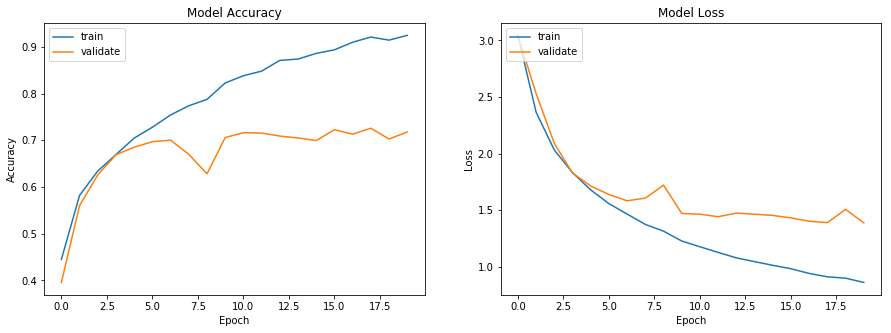

In [86]:
print(history.history.keys())

plotmodelhistory(history)

In [89]:
scores = model.evaluate(X_test,Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1251/1251 [==============================] - 188s 151ms/step
Test loss: 1.3892972744244942
Test accuracy: 0.717825710773468


This is a Military ship.


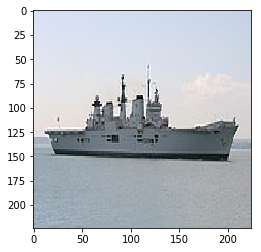

In [90]:
x= np.random.randint(0,len(test_set))

pred = model.predict(test_set[x].reshape(1,224,224,3),32)
for i,j in ship_type.items():
    if np.argmax(pred) == j:
        print ('This is a '+ str(i)+ ' ship.')

plt.imshow(test_set[x])